In [1]:
%pip install scikit-learn pandas matplotlib scipy numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Column names in the dataset: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


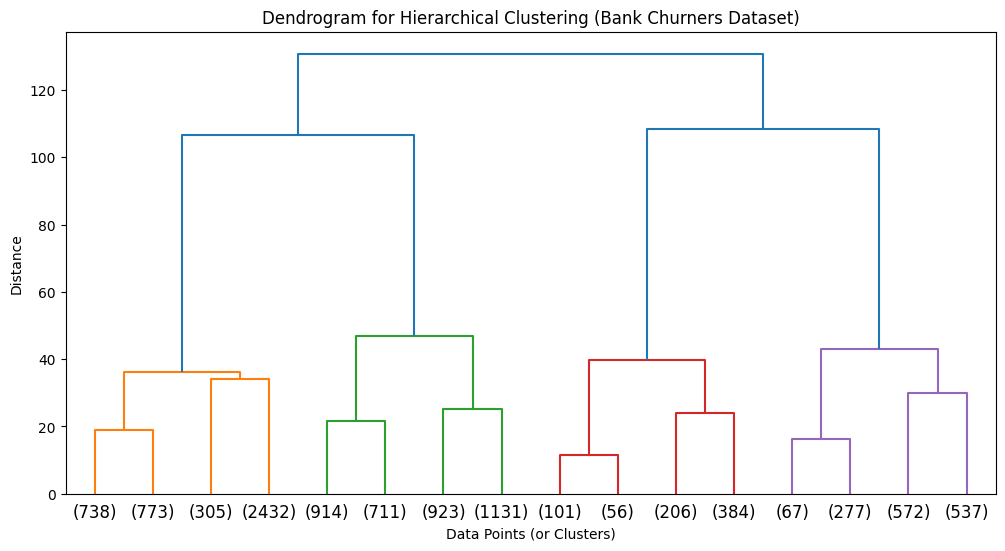

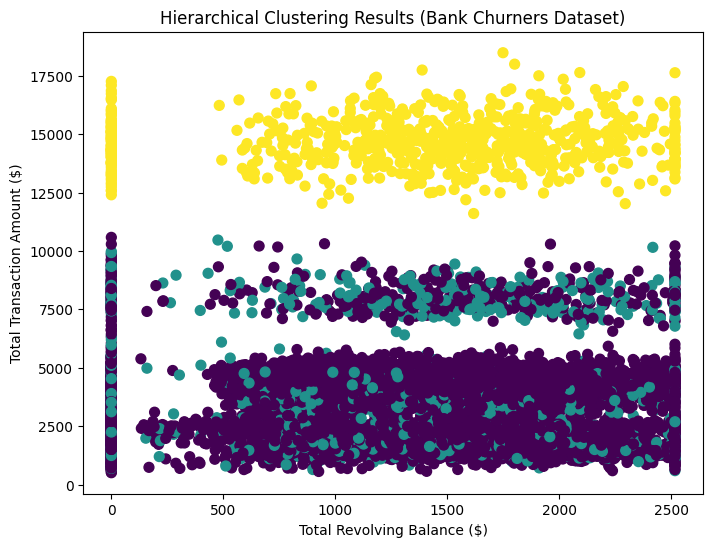

Number of points in each cluster: [7927 1453  747]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the Credit Card dataset.py dataset from CSV
# Replace 'BankChurners.csv' with the path to your downloaded file
data = pd.read_csv('BankChurners.csv')

# Step 2: Inspect column names to verify dataset structure
print("Column names in the dataset:", data.columns.tolist())

# Step 3: Preprocess the data
# Drop non-numerical column (CLIENTNUM) and exclude categorical columns
data = data.drop('CLIENTNUM', axis=1)

# Select numerical columns for clustering
numerical_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Total_Trans_Amt', 'Total_Trans_Ct'
]
data = data[numerical_columns]

# Handle missing values by filling with column means
data = data.fillna(data.mean())

# Select features for clustering (Total_Revolving_Bal, Total_Trans_Amt, Credit_Limit)
X = data[['Total_Revolving_Bal', 'Total_Trans_Amt', 'Credit_Limit']].values

# Standardize the features to ensure equal weighting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Compute the linkage matrix for hierarchical clustering
# Using Ward's method for linkage
linkage_matrix = linkage(X_scaled, method='ward')

# Step 5: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)  # Show top 3 levels for clarity
plt.title('Dendrogram for Hierarchical Clustering (Bank Churners Dataset)')
plt.xlabel('Data Points (or Clusters)')
plt.ylabel('Distance')
plt.show()

# Step 6: Perform agglomerative clustering
# Choose 3 clusters based on the dendrogram
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)

# Step 7: Visualize the clusters (using Total_Revolving_Bal and Total_Trans_Amt)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering Results (Bank Churners Dataset)')
plt.xlabel('Total Revolving Balance ($)')
plt.ylabel('Total Transaction Amount ($)')
plt.show()

# Step 8: Print number of points in each cluster
print("Number of points in each cluster:", np.bincount(labels))